# Showcasing postprocessing functionality

Given a set of views per cell / entity this notebook shows how one can run a simple analysis with the functions provided in this repository (10/04/18).


In [1]:
from neuronencodings import postprocessing, plotting

/home/svenmd/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import os 
import glob
import h5py

HOME = os.path.expanduser("~")

## Load views

Adjust to your data storage.


In [3]:
folder_path = "%s/view_data/views/pinky_axon_ae_1000_local_v4/" % HOME
view_paths = glob.glob("%s/*.h5" % folder_path)

In [4]:
cell_views = []

for view_path in view_paths:
    with h5py.File(view_path, "r") as f:
        cell_views.append(f["views"].value)

## Combine views

In [15]:
combined_cell_views = []

for views in cell_views:
    combined_cell_views.append(postprocessing.combine_views(views, use_hist=True))    

## Extract lower dimensional embeddings

In [16]:
pca_emb = postprocessing.pca(combined_cell_views)

In [17]:
tsne_emb = postprocessing.tsne(combined_cell_views)

## Visualize embeddings

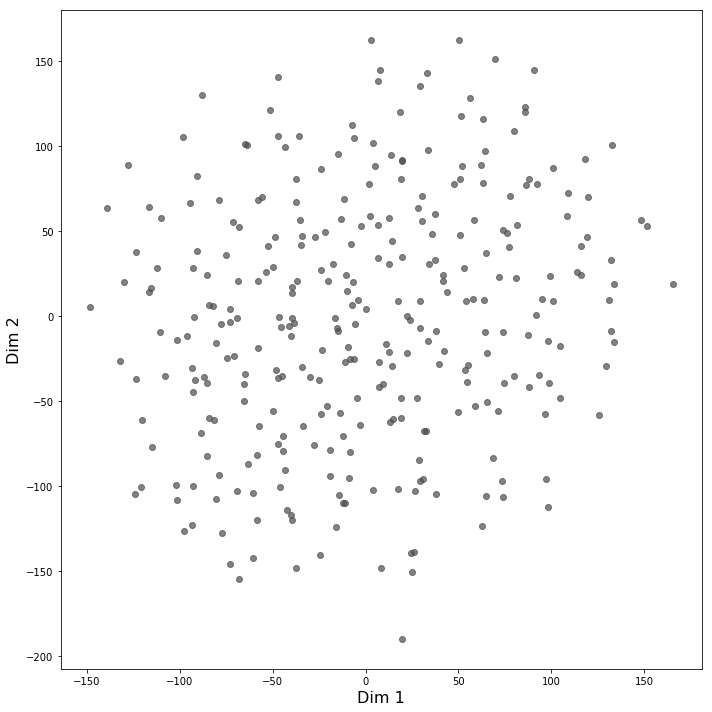

In [18]:
plotting.plot_2d(tsne_emb)

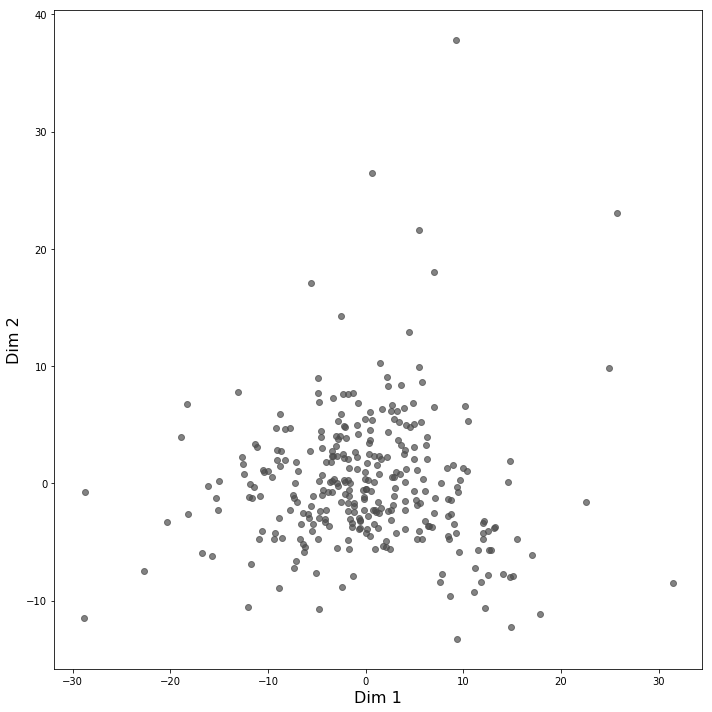

In [19]:
plotting.plot_2d(pca_emb)